In [1]:
%pylab inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import nltk
from dateutil import parser as dateparser 
from collections import Counter, Mapping, Sequence, defaultdict
from itertools import groupby
import re
import csv

Populating the interactive namespace from numpy and matplotlib


In [31]:
import os

In [23]:
CLASSES = ['open', 'not a real question', 'not constructive', 'off topic', 'too localized']
status = dict( (k, str(i+1)) for i,k in enumerate(CLASSES))

In [24]:
RE_NONALNUM = re.compile(r'\W+')
RE_NONANS   = re.compile(r'[^\w\s]+')
RE_DIGIT    = re.compile(r'\d+')
RE_URL      = re.compile(r'https?://')
RE_NONWORD  = re.compile(r'[A-Z\d]+')

In [26]:
def norm(string):
    return RE_NONANS.sub('', string).lower()

def norm_tag(string):
    return RE_NONALNUM.sub('', string).lower()

In [27]:
def norm_bow_tokens(bow):
    # Remove nonalphanumeric components of the word, due to VW format restrictions
    retval = defaultdict(int)
    for key, value in bow.iteritems():
        key = RE_NONALNUM.sub('',key)
    if key:
        retval[key] += value
    return retval

In [28]:
def ngram(seq, n):
    dist = Counter( '_'.join(seq[pos:pos+n]) for pos in xrange(len(seq) - n + 1) )
    return dist

In [12]:
filename = "train_stoverflow.csv"

In [14]:
open(filename)

<_io.TextIOWrapper name='train_stoverflow.csv' mode='r' encoding='UTF-8'>

In [39]:
csv = pd.read_csv('train_stoverflow.csv', encoding='cp1251', index_col='PostId', parse_dates=['PostCreationDate', 'OwnerCreationDate', 'PostClosedDate'], infer_datetime_format=True, )

In [40]:
csv.head()

,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
PostId,,,,,,,,,,,,,,
1402214,2011-08-10 21:24:36,877278,2011-08-03 17:57:10,17,0,GET/Post values don't be refreshed/parsed by t...,![Get-values don't be refreshed][1]\r\r\n\r\r\...,php,apache,NaN,NaN,NaN,2011-08-10 21:57:14,1
2338671,2011-07-09 15:46:51,45954,2008-12-12 21:03:08,1757,22,Search control in Haskell,Suppose you're writing a program that searches...,search,haskell,lazy-evaluation,inference,NaN,NaT,0
2042048,2011-05-03 15:48:34,1185829,2011-03-28 13:20:36,1,0,jQuery: event.preventdefault not working with ...,I have this bit of jQuery toggling a paragraph...,jquery,firefox,toggle,preventdefault,NaN,NaT,0
1672620,2011-12-07 17:28:40,1086278,2011-12-07 17:18:32,1,0,java 2 dimensional arrays,\\I need to look through an array from east to...,java,arrays,NaN,NaN,NaN,2011-12-07 18:33:56,4
3103106,2011-12-16 04:07:33,1002323,2011-10-19 00:33:34,16,2,Which interface is used to detect key events f...,I've created a simple custom dialog that asks ...,android,sdk,dialog,onkeyup,onkeydown,NaT,0


In [41]:
type(csv.PostCreationDate.get(1402214))

pandas.tslib.Timestamp

In [42]:
csv.describe()

,OwnerUserId,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,OpenStatus
count,3.700000e+04,37000.000000,37000.000000,37000.000000
mean,6.113169e+05,545.968568,21.147541,0.810811
std,4.335216e+05,2222.474706,84.753640,1.332316
min,1.120000e+02,-20.000000,0.000000,0.000000
25%,2.335320e+05,3.000000,0.000000,0.000000
50%,5.461705e+05,46.000000,1.000000,0.000000
75%,9.572598e+05,332.000000,10.000000,1.000000
max,1.566958e+06,114052.000000,4385.000000,4.000000


In [43]:
csv.OpenStatus.value_counts()

0    25000
4     3000
3     3000
2     3000
1     3000
Name: OpenStatus, dtype: int64

In [58]:
import matplotlib.pyplot as plt
csv['TagCount'] = csv.Tag1.isnull().astype(int) + csv.Tag2.isnull().astype(int) +csv.Tag3.isnull().astype(int) +csv.Tag4.isnull().astype(int)+csv.Tag5.isnull().astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1372bdd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1371b0c88>]], dtype=object)

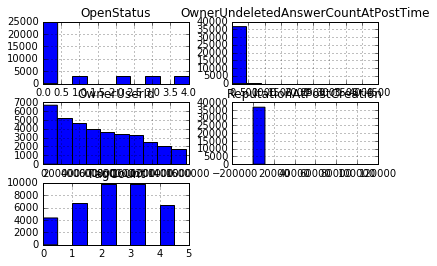

In [61]:
csv.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1255437f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1169bff28>]], dtype=object)

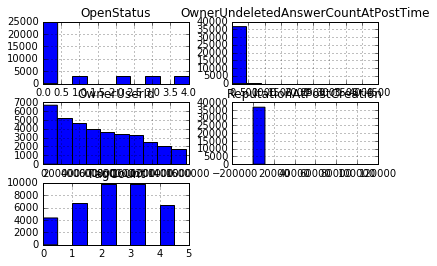

In [84]:
plt.hist(csv[csv['OpenStatus'] == ])

In [118]:
csv['LogReputation'] = np.log(csv.ReputationAtPostCreation)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtclf = DecisionTreeClassifier()

In [121]:
dtclf.fit(csv[['TagCount', 'ReputationAtPostCreation']], csv.OpenStatus)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [122]:
dtclf.score(csv[['TagCount', 'ReputationAtPostCreation']], csv.OpenStatus)

0.70964864864864863

In [112]:
from sklearn.grid_search import GridSearchCV

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [114]:
abclf = AdaBoostClassifier()

In [120]:
abclf.fit(csv[['TagCount', 'ReputationAtPostCreation']], csv.OpenStatus)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [117]:
abclf.score(csv[['TagCount', 'ReputationAtPostCreation']], csv.OpenStatus)

0.67194594594594592